In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
data=pd.read_csv('weight_change_dataset.csv')

In [3]:
data.head()

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,56,M,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8
2,3,32,F,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2
3,4,25,F,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3
4,5,38,M,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5


## Comment
So, we are going to predict the final weight based on the daily routines of people. Here we have what each column represent:
1. Participant ID: Unique identifier for each participant in the study.
2. Age: The age of the participant (in years).
3. Gender: Gender of the participant (M/F).
4. Current Weight (lbs): The participant's weight at the beginning of the study.
5. BMR (Calories): Basal Metabolic Rate, representing the number of calories burned at rest.
6. Daily Calories Consumed: Total caloric intake per day.
7. Daily Caloric Surplus/Deficit: The difference between calories consumed and BMR, indicating whether the participant is in a caloric surplus or deficit.
8. Weight Change (lbs): The estimated change in weight over a specified duration, based on caloric surplus/deficit.
9. Duration (weeks): The time period over which weight change is measured, ranging from 1 to 12 weeks.
9. Physical Activity Level: Self-reported level of physical activity, categorized as Sedentary, Lightly Active, Moderately Active, or Very Active.
10. Macronutrient Breakdown: Composition of the participant's diet, expressed as percentages of carbohydrates, proteins, and fats.
11. Sleep Quality: Self-reported quality of sleep, categorized as Poor, Fair, Good, or Excellent, which can affect weight management.
12. Stress Level: A numerical score (1-10) indicating the participant's perceived stress level.
13. Final Weight (lbs): The final weight of the participation after the certain period of time.

In [4]:
data.describe()

,Participant ID,Age,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Stress Level,Final Weight (lbs)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,37.910000,171.533000,2518.206000,3518.292000,1000.091000,-2.779817,6.920000,4.810000,168.750000
std,29.011492,12.219454,30.333856,364.431221,513.313097,371.560827,7.443719,3.515277,2.576879,30.588004
min,1.000000,18.000000,100.000000,1566.500000,2030.900000,82.500000,-35.678115,1.000000,1.000000,98.200000
25%,25.750000,26.750000,153.650000,2255.050000,3233.300000,766.950000,-5.012312,4.000000,2.750000,149.550000
50%,50.500000,38.000000,172.150000,2519.500000,3636.050000,1013.100000,0.100000,7.000000,5.000000,169.800000
75%,75.250000,46.250000,192.475000,2805.975000,4000.000000,1253.325000,1.850000,10.000000,7.000000,188.300000
max,100.000000,59.000000,238.200000,3390.800000,4000.000000,1922.500000,5.000000,12.000000,9.000000,232.500000


## Comment
Here, we have the description of our data. Some interesting insights emerge:

1. BMR (Basal Metabolic Rate) - The average BMR, or calories burned at rest, is around 2518 Calories, which is relatively high. This suggests that the group may be quite active or includes individuals with higher metabolic demands.
2. Weight Change - The mean value for weight change suggests that, on average, people in this dataset are more likely to lose weight rather than gain it. This could indicate successful calorie deficits or lifestyle adjustments in their routines.
3. Duration - The standard deviation  is 3.5, indicating moderate variation around the mean length of time. This variability suggests that while some individuals might adhere to their plan longer, others may have shorter commitment periods.
4. Stress Level - The distribution and central tendency indicators for stress levels reveal that a significant portion of people experience higher-than-ideal stress. High stress can often impact weight goals, sleep, and general health.


In [5]:
data.dtypes

Participant ID                     int64
Age                                int64
Gender                            object
Current Weight (lbs)             float64
BMR (Calories)                   float64
Daily Calories Consumed          float64
Daily Caloric Surplus/Deficit    float64
Weight Change (lbs)              float64
Duration (weeks)                   int64
Physical Activity Level           object
Sleep Quality                     object
Stress Level                       int64
Final Weight (lbs)               float64
dtype: object

## Comment
We need to convert some variables into the numbers in order to create regression models.

# Data Preprocessing

In [6]:
data_encoded = data.copy()

# Encode 'Gender'
data_encoded['Gender'] = data_encoded['Gender'].map({'M': 0, 'F': 1})

# Encode 'Physical Activity Level'
activity_mapping = {'Sedentary': 0, 'Lightly Active': 1, 'Moderately Active': 2, 'Very Active': 3}
data_encoded['Physical Activity Level'] = data_encoded['Physical Activity Level'].map(activity_mapping)

# Encode 'Sleep Quality'
sleep_mapping = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}
data_encoded['Sleep Quality'] = data_encoded['Sleep Quality'].map(sleep_mapping)

data_encoded.isnull().sum()
data_encoded.dropna(inplace=True)

## Comment
We mapped gender as 0 for Male and 1 for Female. Additionally, one of the key variables—Physical Activity Level—is scaled from 0 to 5 points to reflect varying activity intensities. Sleep Quality was also mapped, ranging from 0 to 3, to indicate different levels of sleep quality.

# Data exploration

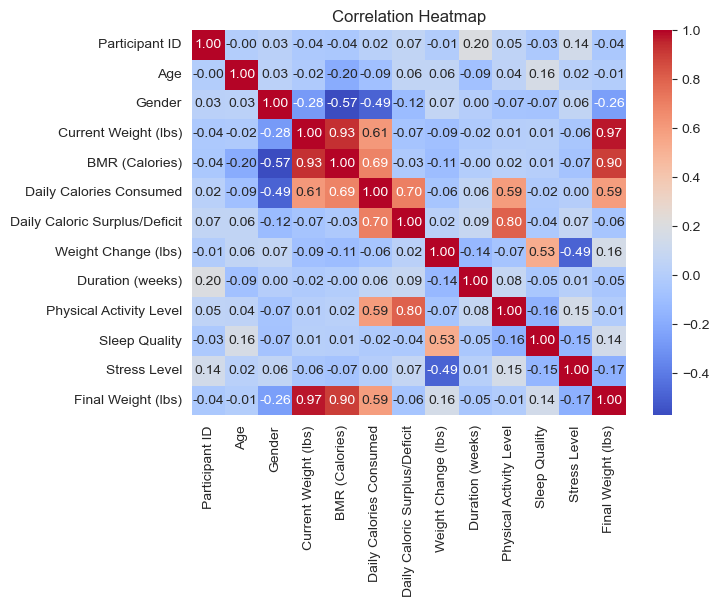

In [18]:
plt.figure(figsize=(7,5))
numeric_cols = data_encoded.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Comment
This correlation heatmap illustrates the relationships between various health and fitness-related variables. The highest correlations appear between Current Weight and Final Weight (0.97) ( which makes sense :) ), as well as between BMR (Calories) and Current Weight (0.93), which is understandable given that basal metabolic rate is closely linked to body weight. Daily Caloric Surplus/Deficit also shows a moderate positive correlation with Daily Calories Consumed (0.70), which could indicate that calorie intake is a significant factor in weight changes. Additionally, Physical Activity Level is moderately correlated with Daily Calories Consumed (0.59), which might suggest that more active individuals consume more calories on average. Overall, the heatmap provides insights into which factors may be more influential in predicting weight-related changes.


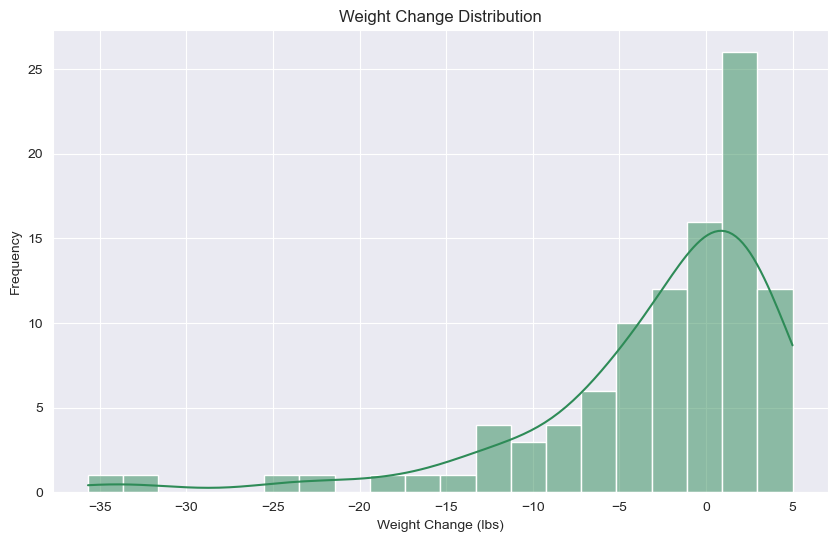

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(data_encoded['Weight Change (lbs)'], bins=20, kde=True, color='seagreen')
plt.title('Weight Change Distribution')
plt.xlabel('Weight Change (lbs)')
plt.ylabel('Frequency')
plt.show()

## Comment
This histogram shows the distribution of weight changes among the individuals in the dataset. The majority of values are centered around a slight weight loss to no weight change, with a peak around 0 to -5 lbs, indicating that most participants did not experience significant weight loss or gain. There is a clear right skew, with a few individuals experiencing substantial weight loss, even reaching up to around -35 lbs. The lack of significant weight gain across the sample suggests that weight loss or maintenance was more common in this group.

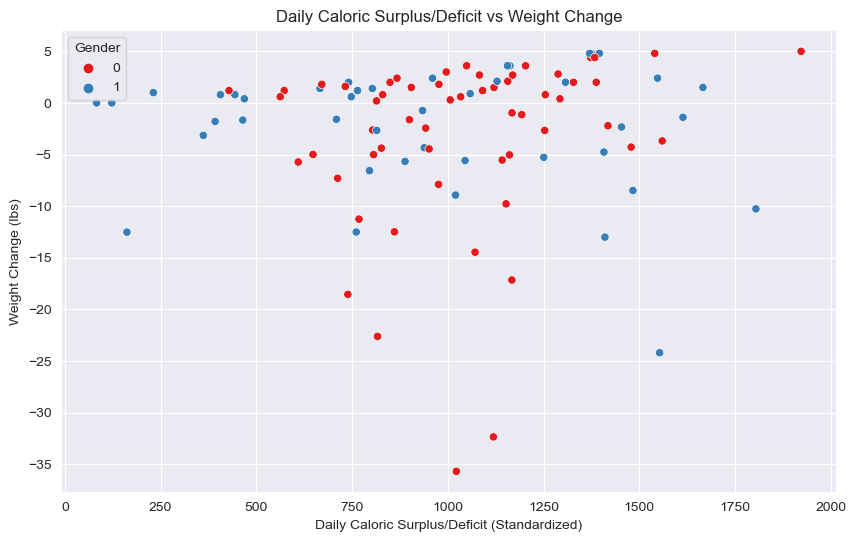

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Daily Caloric Surplus/Deficit', y='Weight Change (lbs)', data=data_encoded, hue='Gender', palette='Set1')
plt.title('Daily Caloric Surplus/Deficit vs Weight Change')
plt.xlabel('Daily Caloric Surplus/Deficit (Standardized)')
plt.ylabel('Weight Change (lbs)')
plt.show()

## Comment
This scatter plot shows the relationship between daily caloric surplus/deficit and weight change, with points differentiated by gender. There is a little trend where higher caloric deficits tend to correspond with greater weight loss (negative values on the y-axis). However, at higher caloric levels, weight change appears more variable, with some individuals gaining, maintaining, or losing weight. Gender does not show a strong separation in the weight change patterns in relation to caloric surplus/deficit, suggesting similar responses in weight change to caloric intake across genders.

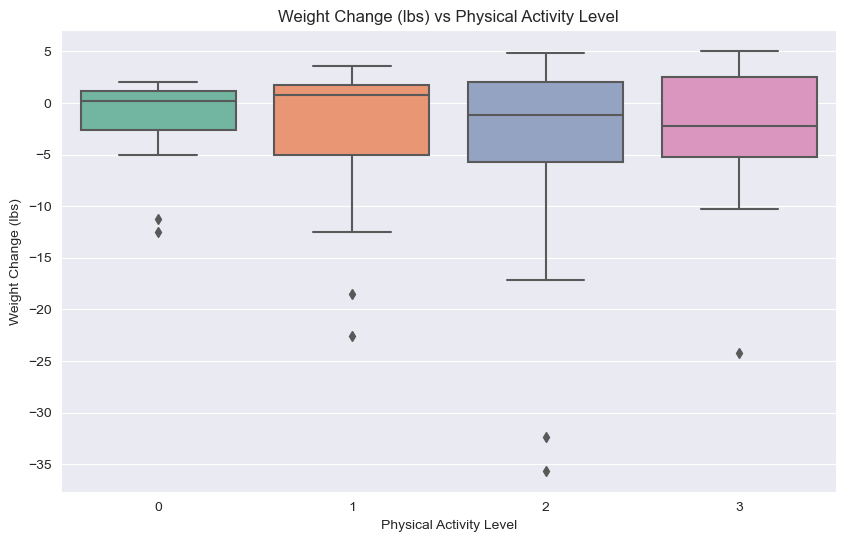

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_encoded, x='Physical Activity Level', y='Weight Change (lbs)', palette='Set2')
plt.title('Weight Change (lbs) vs Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Weight Change (lbs)')
plt.show()

## Comment
For each physical activity level, the median weight change is close to zero or slightly negative, with outliers indicating individuals who experienced more significant weight loss, especially at activity levels 1, 2, and 3. Level 2 has the widest range of weight changes, suggesting greater variability in weight outcomes for individuals with moderate activity levels. Overall, higher physical activity does not guarantee weight loss, but outliers at higher levels of activity show some individuals experiencing more substantial weight reduction.

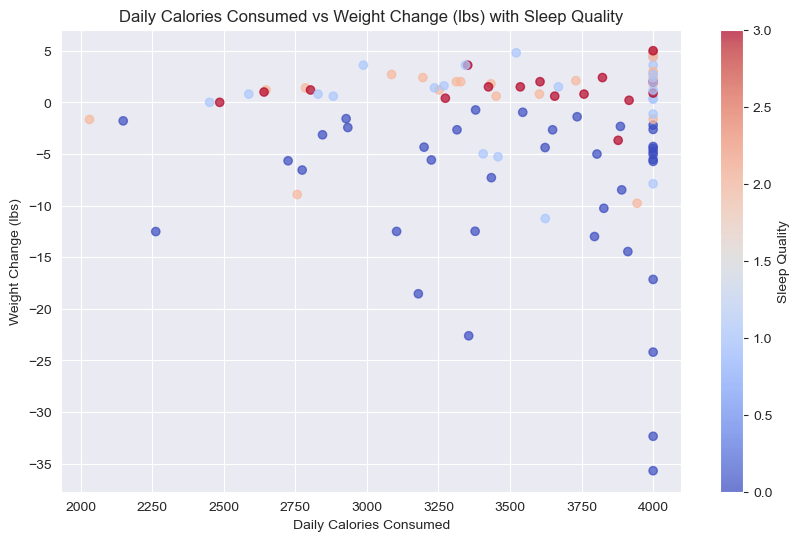

In [11]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data=data, x='Daily Calories Consumed', y='Weight Change (lbs)',
                      c=data_encoded['Sleep Quality'], cmap='coolwarm', alpha=0.7)
plt.colorbar(scatter, label='Sleep Quality')
plt.title('Daily Calories Consumed vs Weight Change (lbs) with Sleep Quality')
plt.xlabel('Daily Calories Consumed')
plt.ylabel('Weight Change (lbs)')
plt.show()

## Comment
This scatter plot examines the relationship between daily calories consumed and weight change (in pounds), with color coding for sleep quality. Generally, most points cluster around minimal weight change (0 to -5 lbs), regardless of calorie intake, suggesting that weight change does not strongly correlate with daily calorie consumption alone. However, as daily calories consumed increase, there are more instances of larger weight loss, especially below -10 lbs, indicating that some individuals consuming higher calories may still experience significant weight loss. Sleep quality, represented by color, appears dispersed, implying no clear connection between sleep quality and weight change within this data.


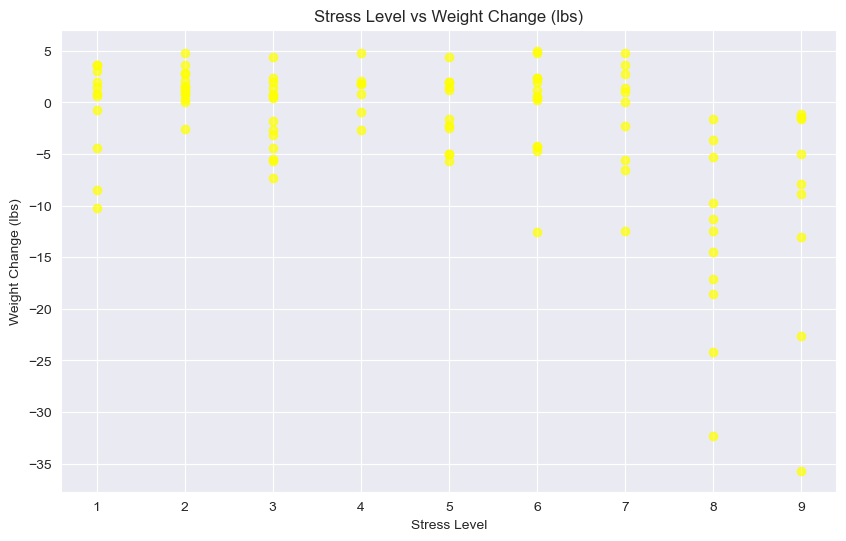

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(data=data, x='Stress Level', y='Weight Change (lbs)', alpha=0.7, color='yellow')
plt.title('Stress Level vs Weight Change (lbs)')
plt.xlabel('Stress Level')
plt.ylabel('Weight Change (lbs)')
plt.grid(True)
plt.show()

## Comment
 It shows a general pattern where individuals with lower stress levels (1–5) mostly experience little to no weight change, clustering around 0 to -5 lbs. However, as stress levels increase (especially at levels 8 and 9), there is a noticeable increase in weight loss, with some individuals showing significant weight reduction, even reaching below -35 lbs. This suggests that higher stress levels may be associated with greater weight loss, although the trend is not uniformly strong across all points.

# Data modeling

Linear Regression - MAE: 3.661118564434092, MSE: 23.23114019613462,  R2: 0.9812638934588593


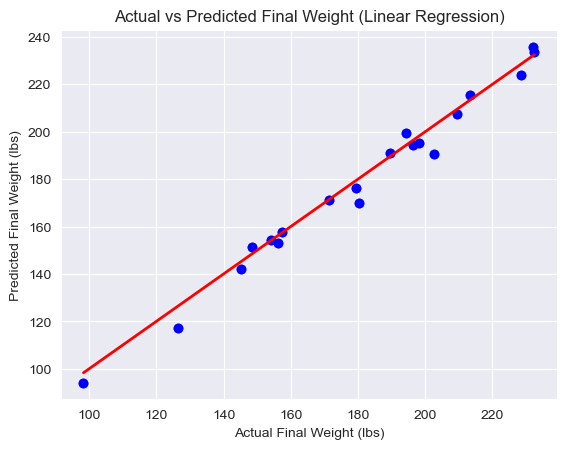

In [13]:
Xx = data_encoded[['Age', 'Current Weight (lbs)', 'BMR (Calories)', 'Daily Calories Consumed', 'Daily Caloric Surplus/Deficit', 'Duration (weeks)', 'Stress Level']]
yy = data_encoded['Final Weight (lbs)']

scaler = StandardScaler()                      
X_scaled = scaler.fit_transform(Xx)
Xx_train, Xx_test, yy_train, yy_test = train_test_split(X_scaled, yy, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(Xx_train, yy_train)

y_pred_lr = lr.predict(Xx_test)                                   

mse_lr = mean_squared_error(yy_test, y_pred_lr)                   #
r2_lr = r2_score(yy_test, y_pred_lr)
mae=mean_absolute_error(yy_test, y_pred_lr)
print(f"Linear Regression - MAE: {mae}, MSE: {mse_lr},  R2: {r2_lr}")

plt.scatter(yy_test, y_pred_lr, color='blue')                     
plt.scatter(yy_test, y_pred_lr, color='blue')
plt.plot([yy_test.min(), yy_test.max()], [yy_test.min(), yy_test.max()], color='red', lw=2)
plt.xlabel('Actual Final Weight (lbs)')
plt.ylabel('Predicted Final Weight (lbs)')
plt.title('Actual vs Predicted Final Weight (Linear Regression)')
plt.show()


## Comment
The first model is created using variables with a strong correlation to final weight, as well as other factors considered crucial for weight gain or loss. The R² score is 0.98, indicating that the model explains 98% of the variance in the final weight, which is an excellent result. The MSE (Mean Squared Error) is 23.23, suggesting that, on average, the squared prediction errors are relatively low, which reflects the model’s accuracy in weight prediction. The MAE (Mean Absolute Error) is 3.66, meaning that, on average, the model's predictions are off by around 3.66 lbs. This small margin of error indicates reliable performance, though it could potentially be improved by further tuning or adding more relevant features. Overall, these metrics suggest the model has both high explanatory power and precision in predicting final weight based on selected features.

In [14]:
X_reg=data_encoded.drop(columns=['Weight Change (lbs)', 'Participant ID', 'Final Weight (lbs)'])
Y_reg=data_encoded['Final Weight (lbs)']
X_train, X_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.2, random_state=42)

results = []
for degree in range(1, 7):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae=mean_absolute_error(y_test, y_pred)

    results.append((degree, mae, mse, r2))

results_df = pd.DataFrame(results, columns=["Degree", "MAE", "MSE", "R2 Score"])
print("Results for different degrees:")
print(results_df)

Results for different degrees:
   Degree        MAE          MSE  R2 Score
0       1   3.300678    19.010245  0.984668
1       2   9.474791   122.628398  0.901099
2       3  15.521255   396.282116  0.680395
3       4  19.415325  1417.649956 -0.143346
4       5  20.196347  1284.909798 -0.036290
5       6  18.958323   782.530138  0.368883


## Comment
Next I created the model that uses almost nearly every variable. Here are some observations:
* Degree 1: The linear regression (1st degree) performs best, with an R² score of 0.98 and MSE of 19.01. The low MAE (3.30) and R² score indicate accurate predictions. This suggests that a simple linear model may be sufficient for the data.
* Degree 2: When increasing to 2nd degree, performance declines significantly with an R² of 0.90 and an MSE of 126.55. This suggests overfitting, as the added complexity doesn’t improve accuracy on unseen data.
* Degree 3: With 3rd-degree polynomial features, R² drops further to 0.68 and MSE rises to 396.28. This indicates the model is struggling with the increased complexity and is unable to generalize well.
* Degrees 4–6: At these higher degrees, the R² score becomes negative or remains low, with MSE values in the thousands. This indicates severe overfitting, as the model is overly complex and fails to generalize to test data, resulting in poor predictions.


# Lasso and Rigde Regression

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reg)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_reg, test_size=0.2, random_state=42)

alpha_values = np.logspace(-3, 2, 10)  # from 0.001 to 100

results = []

for degree in range(1, 4):  
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    lasso = Lasso(max_iter=5000)
    lasso_cv = GridSearchCV(lasso, {'alpha': alpha_values}, scoring='neg_mean_squared_error', cv=5)
    lasso_cv.fit(X_train_poly, y_train)

    ridge = Ridge()
    ridge_cv = GridSearchCV(ridge, {'alpha': alpha_values}, scoring='neg_mean_squared_error', cv=5)
    ridge_cv.fit(X_train_poly, y_train)

    best_lasso = lasso_cv.best_estimator_
    best_ridge = ridge_cv.best_estimator_

    y_pred_lasso = best_lasso.predict(X_test_poly)
    y_pred_ridge = best_ridge.predict(X_test_poly)

    results.append({
        "Degree": degree,
        "Model": "Lasso",
        "Best Alpha": lasso_cv.best_params_['alpha'],
        "MAE": mean_absolute_error(y_test, y_pred_lasso),
        "MSE": mean_squared_error(y_test, y_pred_lasso),
        "R2": r2_score(y_test, y_pred_lasso)
    })

    results.append({
        "Degree": degree,
        "Model": "Ridge",
        "Best Alpha": ridge_cv.best_params_['alpha'],
        "MAE": mean_absolute_error(y_test, y_pred_ridge),
        "MSE": mean_squared_error(y_test, y_pred_ridge),
        "R2": r2_score(y_test, y_pred_ridge)
    })

results_df = pd.DataFrame(results)
print("Results for different polynomial degrees and for Lasso and Ridge regression:")
print(results_df)

Results for different polynomial degrees and for Lasso and Ridge regression:
   Degree  Model  Best Alpha        MAE         MSE        R2
0       1  Lasso    0.166810   3.289812   17.154888  0.986164
1       1  Ridge    0.599484   3.307445   17.948250  0.985525
2       2  Lasso    0.166810   2.061877    8.044449  0.993512
3       2  Ridge    2.154435   3.249134   17.828534  0.985621
4       3  Lasso    0.046416   4.988038   85.772369  0.930824
5       3  Ridge  100.000000  14.408457  676.257306  0.454593


## Comment
Here’s an analysis of the models performance across different polynomial degrees:

Degree 1: Both Lasso and Ridge show strong results, with high R² (0.98) and low MAE (3.3), indicating that a linear approach fits the data well.

Degree 2: Lasso performs exceptionally with an R² of 0.99 and the lowest MSE (8.04), suggesting that adding a few polynomial terms can improve the model without overfitting. Ridge performs reasonably well, but not as strong as Lasso.

Degree 3: Both models see a drop in performance, especially Ridge (R² = 0.45). This suggests that the added complexity leads to overfitting, capturing noise rather than meaningful trends.

In summary, Degree 1 and 2 models, particularly with Lasso, offer the best performance while keeping complexity manageable.


# Random Forest Tree Regression

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_reg,Y_reg , test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, R2: {r2_rf}")

Random Forest - MAE: 5.731400000000022, MSE: 53.30081300000073, R2: 0.9570124538586535


## Comment

The Random Forest regression results, with a MAE of 5.74, MSE of 53.63, and R² of 0.96, indicate poorer performance compared to previous models. While the high R² suggests a good fit to the data, the MAE and MSE values reveal greater forecasting errors. Random Forest can sometimes struggle with overfitting when the data contains noise or irrelevant features, leading to less accurate predictions in certain cases.

# K-Nearest Neighbors

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

def weighted_knn_predict(xx_train, y_train, xx_test, k):
    predictions = []

    for test_point in xx_test:
        distances = np.linalg.norm(xx_train - test_point, axis=1)
        neighbors_idx = np.argsort(distances)[:k]

        weights = 1 / (distances[neighbors_idx] + 1e-5) 
        neighbor_values = y_train.iloc[neighbors_idx]

        weighted_average = np.dot(weights, neighbor_values) / weights.sum()
        predictions.append(weighted_average)

    return np.array(predictions)

k =7
y_pred = weighted_knn_predict(x_train_scaled, y_train, x_test_scaled, k)

mae=mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Weighted K-NN Regression -MAE:{mae}, MSE: {mse}, R2: {r2}")

Weighted K-NN Regression -MAE:13.674462977449712, MSE: 273.9134814975155, R2: 0.7790865136595357


## Comment

The K-Nearest Neighbors (K-NN) regression results show a MAE of 14.16, MSE of 305.61, and R² of 0.75, indicating a drop in performance. The low R² means the model explains only a small part of the data's variability, and the high MAE and MSE show significant errors in predictions. This lower performance could be because K-NN only looks at distances between points without considering the relationships between different features. This can make the model sensitive to noise and outliers in the data, resulting in less accurate predictions.

# Podium
1. Lasso Regression Degree 2: R² 0.993
2. Lasso Regression Degree 1: R² 0.986
3. Rigde Regression Degree 2: R² 0.985